This script plots slab boundary layer model quasi-steady-state solutions of zonal velocity (BL), meridional velocity (BL), relative vorticity (BL), and vertical velocity (top of BL). Comparisons are made with GCM output.

Author: Alex Gonzalez (agon@iastate.edu). June 2022.

In [1]:
import numpy as np 

import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from mpl_toolkits.axes_grid1 import ImageGrid

In [30]:
# latitude range and resolution for sblm model grid
res_sblm = 0.25
latS = -30
latN = 30

Two = 2.
Om = 7.292e-5
Rd = 287 
Rv = 461
ae = 6.371e6 # radius of Earth

capk = 1000000

In [64]:
mainfolder = '/Users/alexgonzalez/Google Drive/My Drive/ITCZ_sblm_1D/ERA5/'
# output directory

figfolder = mainfolder+'figures/'

# input directories
dri = mainfolder+'/progs/control/'

ishconst = True

fni = 'Tv_allmon.nc'   # file name

data = xr.open_dataset(dri+fni, decode_times=False, engine='netcdf4')
 
nt = int(len(data['t_out'].values)/1)
    
u_all = data['u'].isel(t_out=nt-1)
v_all = data['v'].isel(t_out=nt-1)
w_all = data['w'].isel(t_out=nt-1)
    
#pgf_all[mm,:] = data['pgf']

In [65]:
phi = data['phi_out'].values
dphi = np.abs(phi[1]-phi[0])
lat_sblm = phi*180/np.pi

In [66]:
dri = mainfolder+'/progs/data_preproc/monthly/'
fni = 'h_forcing2.nc'

datah = xr.open_dataset(dri+fni, decode_times=False)

h_all = datah['h']

In [67]:
# apply diffferent metadata to SBLM sims
u_all = u_all.rename({'phi_out': 'latitude'})
u_all.coords['latitude'] = phi*180/np.pi

v_all = v_all.rename({'phi_out': 'latitude'})
v_all.coords['latitude'] = phi*180/np.pi

In [57]:
u_all

<xarray.DataArray 'u' (month: 12, latitude: 241)>
array([[ 0.      , -0.178291, -0.360401, ..., -0.231511, -0.114701,  0.      ],
       [ 0.      , -0.179633, -0.363119, ..., -0.166656, -0.082304,  0.      ],
       [ 0.      , -0.153078, -0.309685, ..., -0.12032 , -0.05901 ,  0.      ],
       ...,
       [ 0.      , -0.13512 , -0.27417 , ..., -0.188876, -0.093223,  0.      ],
       [ 0.      , -0.164748, -0.333339, ..., -0.235409, -0.116441,  0.      ],
       [ 0.      , -0.167109, -0.337991, ..., -0.237914, -0.117813,  0.      ]])
Coordinates:
    t_out     float64 0.0
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * month     (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    long_name:  zonal wind in boundary layer
    units:      m/s

In [212]:
# compare sblm results with ua, va, and cfd x-rvort, y-conv
lon0 = 235
lon1 = 270
lat0 = -30
lat1 = 30
lev0 = 1000
lev1 = 1000

In [161]:
dri = '/Volumes/alex.gonzalez/'

fn  = 'va_1979-2021_monclm_hres.nc'
data_va = xr.open_dataset(dri+fn,engine='netcdf4')

fn  = 'ua_1979-2021_monclm_hres.nc'
data_ua = xr.open_dataset(dri+fn,engine='netcdf4')

In [162]:
va = data_va['v'][:,:,::-1,:].sel(level=slice(lev0,lev1),latitude=slice(lat0,lat1),longitude=slice(lon0,lon1)).mean(dim=('level'))
ua = data_ua['u'][:,:,::-1,:].sel(level=slice(lev0,lev1),latitude=slice(lat0,lat1),longitude=slice(lon0,lon1)).mean(dim=('level'))

In [189]:
dri = '/Volumes/alex.gonzalez/'

fn  = 'v10m_1979-2021_monclm_hres.nc'
data_vs = xr.open_dataset(dri+fn,engine='netcdf4')

fn  = 'u10m_1979-2021_monclm_hres.nc'
data_us = xr.open_dataset(dri+fn,engine='netcdf4')

In [213]:
vs = data_vs['v10'][:,::-1,:].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))#.mean(dim=('level'))
us = data_us['u10'][:,::-1,:].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))#.mean(dim=('level'))

In [214]:
# land-sea mask
fn_lsm = '/Volumes/alex.gonzalez/ERA5_smooth_clm/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm = data_lsm['lsm'][0,::-1,:].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))

In [215]:
# apply land-sea mask and take zonal average
va_xavg = va.where(lsm==0).mean(dim='longitude')
ua_xavg = ua.where(lsm==0).mean(dim='longitude')

vs_xavg = vs.where(lsm==0).mean(dim='longitude')
us_xavg = us.where(lsm==0).mean(dim='longitude')

In [206]:
ua_xavg

<xarray.DataArray 'u' (time: 12, latitude: 241)>
array([[-2.3314173, -2.48341  , -2.633317 , ...,  1.5523046,  1.6911666,
         1.8836229],
       [-2.4784486, -2.6220741, -2.76475  , ...,  2.391819 ,  2.4978974,
         2.6314225],
       [-1.9195881, -2.0553   , -2.1887736, ...,  3.0614376,  3.1377947,
         3.2498085],
       ...,
       [-0.9774179, -1.1441797, -1.3104446, ...,  2.1537318,  2.2295296,
         2.3475976],
       [-1.7343965, -1.8997426, -2.0641453, ...,  1.7187251,  1.8446099,
         2.0221634],
       [-2.1503577, -2.3015406, -2.4484825, ...,  1.556679 ,  1.704071 ,
         1.8898723]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [216]:
us_xavg

<xarray.DataArray 'u10' (time: 12, latitude: 241)>
array([[-2.1064904 , -2.2389696 , -2.3700864 , ...,  1.3811047 ,
         1.4953458 ,  1.6522877 ],
       [-2.233881  , -2.3588493 , -2.4831767 , ...,  2.0990763 ,
         2.182898  ,  2.2771506 ],
       [-1.7442409 , -1.8629129 , -1.979906  , ...,  2.6977274 ,
         2.756602  ,  2.8200397 ],
       ...,
       [-0.97634315, -1.1146582 , -1.2530173 , ...,  1.9724315 ,
         2.037999  ,  2.1380053 ],
       [-1.6232898 , -1.7622417 , -1.9011568 , ...,  1.569823  ,
         1.6764594 ,  1.8321476 ],
       [-1.9641068 , -2.09367   , -2.21996   , ...,  1.3955146 ,
         1.5203632 ,  1.6832291 ]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [208]:
def center_fd_timlat(field,x):
    [nt,nx] = field.shape
    dfdx = np.zeros((nt,nx))
    dfdx[:,1:nx-1] = (field[:,2:nx] - field[:,0:nx-2])/(x[2:nx] - x[0:nx-2])
    dfdx[:,0]      = (field[:,1] - field[:,0])/(x[1] - x[0])
    dfdx[:,nx-1]     = (field[:,nx-1] - field[:,nx-2])/(x[nx-1] - x[nx-2])
    return dfdx

In [209]:
# compute derived fields as a function of latitude
rv_xavg = -center_fd_timlat(ua_xavg.values,phi)/ae + ua_xavg*np.tan(phi)/ae
cv_xavg = -center_fd_timlat(va_xavg.values,phi)/ae + va_xavg*np.tan(phi)/ae

In [217]:
# compute derived fields as a function of latitude
rvs_xavg = -center_fd_timlat(us_xavg.values,phi)/ae + us_xavg*np.tan(phi)/ae
cvs_xavg = -center_fd_timlat(vs_xavg.values,phi)/ae + vs_xavg*np.tan(phi)/ae

In [218]:
rv_all = -center_fd_timlat(u_all.values,phi)/ae + u_all*np.tan(phi)/ae
cv_all = -center_fd_timlat(v_all.values,phi)/ae + v_all*np.tan(phi)/ae

In [219]:
rv_all

<xarray.DataArray 'u' (month: 12, latitude: 241)>
array([[ 6.41365360e-06,  6.49832017e-06,  6.71886800e-06, ...,
        -4.29867398e-06, -4.17433941e-06, -4.12613370e-06],
       [ 6.46191536e-06,  6.54733657e-06,  6.76993933e-06, ...,
        -3.12366482e-06, -3.00492840e-06, -2.96071495e-06],
       [ 5.50666464e-06,  5.58386946e-06,  5.78680193e-06, ...,
        -2.29880491e-06, -2.16942205e-06, -2.12276139e-06],
       ...,
       [ 4.86064049e-06,  4.94346797e-06,  5.16573058e-06, ...,
        -3.54217713e-06, -3.40557178e-06, -3.35349848e-06],
       [ 5.92646154e-06,  6.01035544e-06,  6.23076612e-06, ...,
        -4.39013101e-06, -4.24462039e-06, -4.18873049e-06],
       [ 6.01138097e-06,  6.09424668e-06,  6.31122935e-06, ...,
        -4.42442386e-06, -4.28978543e-06, -4.23807588e-06]])
Coordinates:
    t_out     float64 0.0
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * month     (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

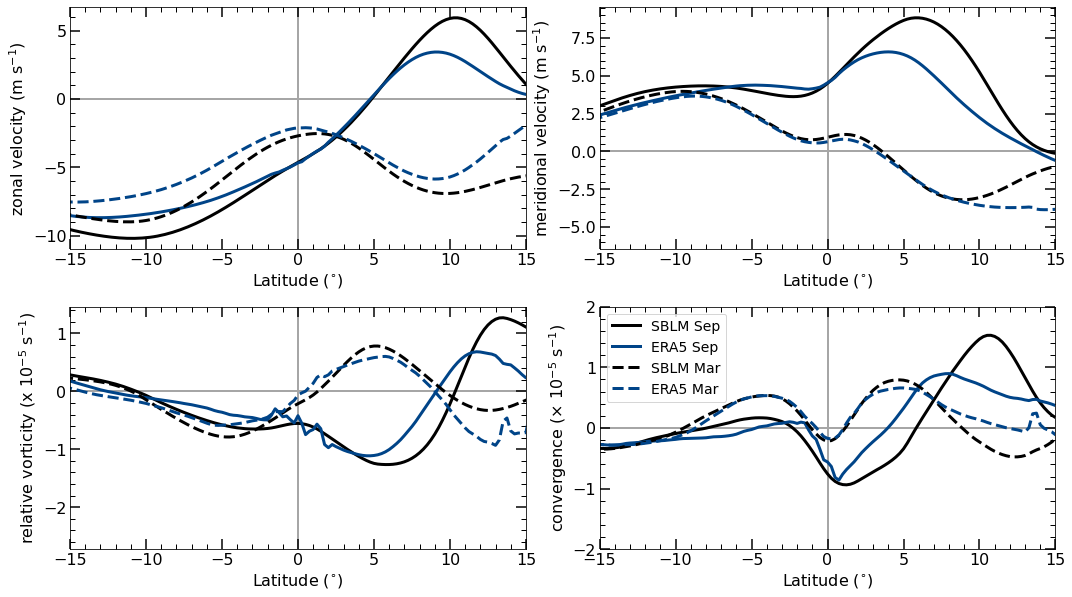

In [220]:
id_mon = 8
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 12), tight_layout='true')
#fig.suptitle('Slab boundary layer model vs. ERA5 climatology for control run', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(3,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Latitude ($^{\circ}$)', fontsize=16)
   plt.xlim(-15,15)
   if jj == 0: 
      plt.ylabel('zonal velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(lat_sblm,u_all[id_mon,:], color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(lat_sblm,ua_xavg[id_mon,:], color=color, linewidth='3')
      color = 'k' 
      lns3 = ax1.plot(lat_sblm,u_all[2,:], color=color, linewidth='3',linestyle='--')
      color = '#004488'
      lns4 = ax1.plot(lat_sblm,ua_xavg[2,:], color=color, linewidth='3',linestyle='--')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,us_xavg[id_mon,:], color=color, linewidth='3')
   if jj == 1: 
      plt.ylabel('meridional velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(lat_sblm,v_all[id_mon,:], color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(lat_sblm,va_xavg[id_mon,:], color=color, linewidth='3')
      color = 'k' 
      lns3 = ax1.plot(lat_sblm,v_all[2,:], color=color, linewidth='3',linestyle='--')
      color = '#004488'
      lns4 = ax1.plot(lat_sblm,va_xavg[2,:], color=color, linewidth='3',linestyle='--')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,vs_xavg[id_mon,:], color=color, linewidth='3')
   if jj == 2: 
      plt.ylabel('relative vorticity (x 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(lat_sblm,rv_all[id_mon,:]*10**5, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(lat_sblm,rv_xavg[id_mon,:]*10**5, color=color, linewidth='3')
      color = 'k' 
      lns3 = ax1.plot(lat_sblm,rv_all[2,:]*10**5, color=color, linewidth='3',linestyle='--')
      color = '#004488'
      lns4 = ax1.plot(lat_sblm,rv_xavg[2,:]*10**5, color=color, linewidth='3',linestyle='--')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,rvs_xavg[id_mon,:]*10**5, color=color, linewidth='3')
   if jj == 3: 
      plt.ylabel(r'convergence ($\times$ 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(lat_sblm,cv_all[id_mon,:]*10**5, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(lat_sblm,cv_xavg[id_mon,:]*10**5, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(lat_sblm,cv_all[2,:]*10**5, color=color, linewidth='3', linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(lat_sblm,cv_xavg[2,:]*10**5, color=color, linewidth='3', linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,cvs_xavg[id_mon,:]*10**5, color=color, linewidth='3', label = 'ERA5_sfc')
      plt.ylim(-2,2)
   if jj == 3: 
      # add these two lines
      lns = lns1+lns2+lns3+lns4
      labs = [l.get_label() for l in lns]
      ax1.legend(lns, labs, loc=2,fontsize=14)
    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvrvcv_curves_Sep_Mar_latx.pdf", dpi=150)

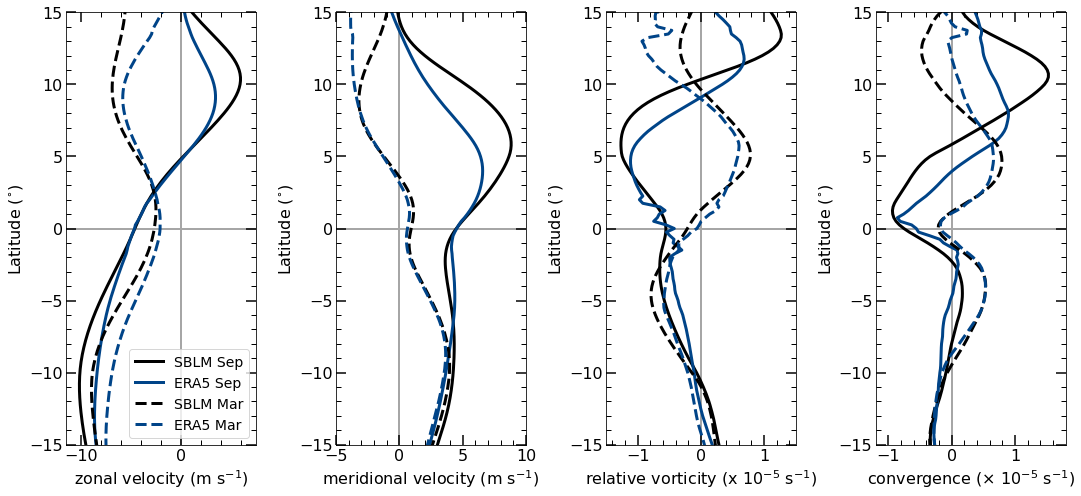

In [221]:
id_mon = 8
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 7), tight_layout='true')
#fig.suptitle('Slab boundary layer model vs. ERA5 climatology for control run', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(1,4,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.ylabel('Latitude ($^{\circ}$)', fontsize=16)
   plt.ylim(-15,15)
   if jj == 0: 
      plt.xlabel('zonal velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(u_all[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(ua_xavg[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(u_all[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(ua_xavg[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,us_xavg[id_mon,:], color=color, linewidth='3')
      plt.xlim(-11.5,7.5)
   if jj == 1: 
      plt.xlabel('meridional velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(v_all[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(va_xavg[id_mon,:],lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(v_all[2,:],lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(va_xavg[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      plt.xlim(-5,10)
      #lns3 = ax1.plot(lat_sblm,vs_xavg[id_mon,:], color=color, linewidth='3')
   if jj == 2: 
      plt.xlabel('relative vorticity (x 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(rv_all[id_mon,:]*10**5, lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(rv_xavg[id_mon,:]*10**5, lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(rv_all[2,:]*10**5, lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(rv_xavg[2,:]*10**5, lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,rvs_xavg[id_mon,:]*10**5, color=color, linewidth='3')
      plt.xlim(-1.5,1.5)
   if jj == 3: 
      plt.xlabel(r'convergence ($\times$ 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(cv_all[id_mon,:]*10**5, lat_sblm,color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(cv_xavg[id_mon,:]*10**5, lat_sblm,color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(cv_all[2,:]*10**5, lat_sblm,color=color, linewidth='3', linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(cv_xavg[2,:]*10**5, lat_sblm,color=color, linewidth='3', linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,cvs_xavg[id_mon,:]*10**5, color=color, linewidth='3', label = 'ERA5_sfc')
      plt.xlim(-1.2,1.8)
   if jj == 0: 
      # add these two lines
      lns = lns1+lns2+lns3+lns4
      labs = [l.get_label() for l in lns]
      ax1.legend(lns, labs, loc=4,fontsize=14)
    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvrvcv_curves_Sep_Mar_laty.pdf", dpi=150)

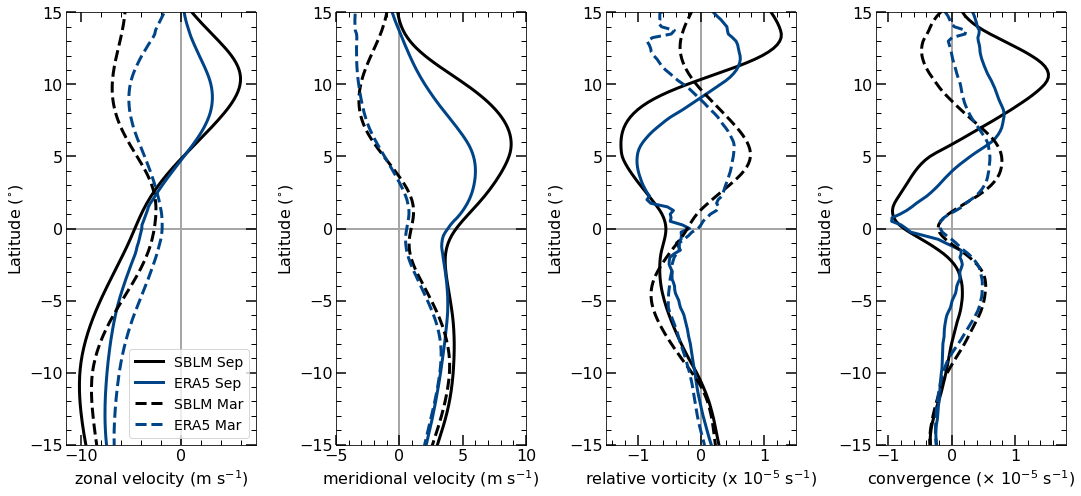

In [249]:
id_mon = 8
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 7), tight_layout='true')
#fig.suptitle('Slab boundary layer model vs. ERA5 climatology for control run', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(1,4,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.ylabel('Latitude ($^{\circ}$)', fontsize=16)
   plt.ylim(-15,15)
   if jj == 0: 
      plt.xlabel('zonal velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(u_all[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(us_xavg[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(u_all[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(us_xavg[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,us_xavg[id_mon,:], color=color, linewidth='3')
      plt.xlim(-11.5,7.5)
   if jj == 1: 
      plt.xlabel('meridional velocity (m s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(v_all[id_mon,:], lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(vs_xavg[id_mon,:],lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(v_all[2,:],lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(vs_xavg[2,:], lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      plt.xlim(-5,10)
      #lns3 = ax1.plot(lat_sblm,vs_xavg[id_mon,:], color=color, linewidth='3')
   if jj == 2: 
      plt.xlabel('relative vorticity (x 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(rv_all[id_mon,:]*10**5, lat_sblm, color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(rvs_xavg[id_mon,:]*10**5, lat_sblm, color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(rv_all[2,:]*10**5, lat_sblm, color=color, linewidth='3',linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(rvs_xavg[2,:]*10**5, lat_sblm, color=color, linewidth='3',linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,rvs_xavg[id_mon,:]*10**5, color=color, linewidth='3')
      plt.xlim(-1.5,1.5)
   if jj == 3: 
      plt.xlabel(r'convergence ($\times$ 10$^{-5}$ s$^{-1}$)', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(cv_all[id_mon,:]*10**5, lat_sblm,color=color, linewidth='3', label = 'SBLM Sep')
      color = '#004488'
      lns2 = ax1.plot(cvs_xavg[id_mon,:]*10**5, lat_sblm,color=color, linewidth='3', label = 'ERA5 Sep')
      color = 'k' 
      lns3 = ax1.plot(cv_all[2,:]*10**5, lat_sblm,color=color, linewidth='3', linestyle='--', label = 'SBLM Mar')
      color = '#004488'
      lns4 = ax1.plot(cvs_xavg[2,:]*10**5, lat_sblm,color=color, linewidth='3', linestyle='--', label = 'ERA5 Mar')
      color = '#BB5566'
      #lns3 = ax1.plot(lat_sblm,cvs_xavg[id_mon,:]*10**5, color=color, linewidth='3', label = 'ERA5_sfc')
      plt.xlim(-1.2,1.8)
   if jj == 0: 
      # add these two lines
      lns = lns1+lns2+lns3+lns4
      labs = [l.get_label() for l in lns]
      ax1.legend(lns, labs, loc=4,fontsize=14)
    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
plt.savefig(figfolder+"sblm_uvrvcv_curves_Sep_Mar_sfc.pdf", dpi=150)

In [223]:
lat0 = -15
lat1 = 15.1

In [224]:
u_all

<xarray.DataArray 'u' (month: 12, latitude: 241)>
array([[ 0.      , -0.178291, -0.360401, ..., -0.231511, -0.114701,  0.      ],
       [ 0.      , -0.179633, -0.363119, ..., -0.166656, -0.082304,  0.      ],
       [ 0.      , -0.153078, -0.309685, ..., -0.12032 , -0.05901 ,  0.      ],
       ...,
       [ 0.      , -0.13512 , -0.27417 , ..., -0.188876, -0.093223,  0.      ],
       [ 0.      , -0.164748, -0.333339, ..., -0.235409, -0.116441,  0.      ],
       [ 0.      , -0.167109, -0.337991, ..., -0.237914, -0.117813,  0.      ]])
Coordinates:
    t_out     float64 0.0
  * latitude  (latitude) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * month     (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    long_name:  zonal wind in boundary layer
    units:      m/s

In [225]:
ua_xavg

<xarray.DataArray 'u' (time: 12, latitude: 241)>
array([[-2.3314173, -2.48341  , -2.633317 , ...,  1.5523046,  1.6911666,
         1.8836229],
       [-2.4784486, -2.6220741, -2.76475  , ...,  2.391819 ,  2.4978974,
         2.6314225],
       [-1.9195881, -2.0553   , -2.1887736, ...,  3.0614376,  3.1377947,
         3.2498085],
       ...,
       [-0.9774179, -1.1441797, -1.3104446, ...,  2.1537318,  2.2295296,
         2.3475976],
       [-1.7343965, -1.8997426, -2.0641453, ...,  1.7187251,  1.8446099,
         2.0221634],
       [-2.1503577, -2.3015406, -2.4484825, ...,  1.556679 ,  1.704071 ,
         1.8898723]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
  * latitude  (latitude) float32 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0

In [226]:
ua_sblm = u_all.sel(latitude=slice(lat0,lat1))
va_sblm = v_all.sel(latitude=slice(lat0,lat1))
rv_sblm = rv_all.sel(latitude=slice(lat0,lat1))
cv_sblm = cv_all.sel(latitude=slice(lat0,lat1))

In [227]:
ua_era5 = ua_xavg.sel(latitude=slice(lat0,lat1))
va_era5 = va_xavg.sel(latitude=slice(lat0,lat1))
rv_era5 = rv_xavg.sel(latitude=slice(lat0,lat1))
cv_era5 = cv_xavg.sel(latitude=slice(lat0,lat1))

In [238]:
us_era5 = us_xavg.sel(latitude=slice(lat0,lat1))
vs_era5 = vs_xavg.sel(latitude=slice(lat0,lat1))
rvs_era5 = rvs_xavg.sel(latitude=slice(lat0,lat1))
cvs_era5 = cvs_xavg.sel(latitude=slice(lat0,lat1))

In [228]:
cv_sblm

<xarray.DataArray 'v' (month: 12, latitude: 121)>
array([[-2.51501795e-06, -2.59436322e-06, -2.64526300e-06, ...,
        -1.22290006e-06, -8.07541107e-07, -3.64425745e-07],
       [-2.77127136e-06, -2.81418861e-06, -2.83932349e-06, ...,
        -2.24141287e-06, -1.75919700e-06, -1.21941117e-06],
       [-3.46182521e-06, -3.48107936e-06, -3.47108186e-06, ...,
        -2.73791986e-06, -2.31960871e-06, -1.78172335e-06],
       ...,
       [-2.73189129e-06, -2.72975778e-06, -2.71680070e-06, ...,
         8.07042198e-07,  7.61260985e-07,  8.27194728e-07],
       [-2.36630904e-06, -2.36498399e-06, -2.34255211e-06, ...,
         8.21016349e-08,  3.37972903e-07,  6.33486607e-07],
       [-2.41401823e-06, -2.45711797e-06, -2.48377661e-06, ...,
        -4.64307768e-07, -7.36657125e-08,  3.59468688e-07]])
Coordinates:
    t_out     float64 0.0
  * latitude  (latitude) float64 -15.0 -14.75 -14.5 -14.25 ... 14.5 14.75 15.0
  * month     (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [229]:
ua_std = ua_era5.std(dim=('latitude'))
va_std = va_era5.std(dim=('latitude'))
rv_std = rv_era5.std(dim=('latitude'))
cv_std = cv_era5.std(dim=('latitude'))

In [239]:
us_std = us_era5.std(dim=('latitude'))
vs_std = vs_era5.std(dim=('latitude'))
rvs_std = rvs_era5.std(dim=('latitude'))
cvs_std = cvs_era5.std(dim=('latitude'))

In [230]:
nmon = 12
month_np = np.arange(1,nmon+1,1)
month = xr.DataArray(month_np,coords=[month_np],dims='month')

In [231]:
#cv_era5[8,:]
#cv_sblm[8,:]

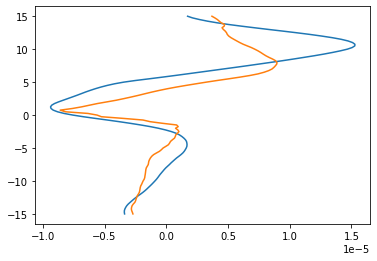

In [232]:
plt.plot(cv_sblm[8,:],cv_sblm['latitude'])
plt.plot(cv_era5[8,:],cv_sblm['latitude'])

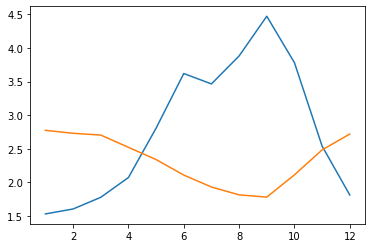

In [233]:
plt.plot(month,ua_std)
plt.plot(month,va_std)

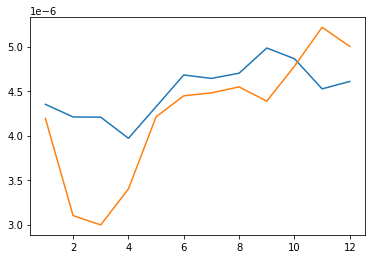

In [234]:
plt.plot(month,rv_std)
plt.plot(month,cv_std)

In [235]:
[nmon,nlat] = ua_era5.shape

In [242]:
from scipy import stats

# conpute RMSD and pattern correlation 
corr_us_vec = np.zeros((nmon))
pval_us_vec = np.zeros((nmon))

corr_vs_vec = np.zeros((nmon))
pval_vs_vec = np.zeros((nmon))

corr_rvs_vec = np.zeros((nmon))
pval_rvs_vec = np.zeros((nmon))

corr_cvs_vec = np.zeros((nmon))
pval_cvs_vec = np.zeros((nmon))

corr_ua_vec = np.zeros((nmon))
pval_ua_vec = np.zeros((nmon))

corr_va_vec = np.zeros((nmon))
pval_va_vec = np.zeros((nmon))

corr_rv_vec = np.zeros((nmon))
pval_rv_vec = np.zeros((nmon))

corr_cv_vec = np.zeros((nmon))
pval_cv_vec = np.zeros((nmon))

RMSE_us = np.zeros((nmon))
RMSE_vs = np.zeros((nmon))
RMSE_rvs = np.zeros((nmon))
RMSE_cvs = np.zeros((nmon))

RMSE_ua = np.zeros((nmon))
RMSE_va = np.zeros((nmon))
RMSE_rv = np.zeros((nmon))
RMSE_cv = np.zeros((nmon))

RMSE_ua_std = np.zeros((nmon))
RMSE_va_std = np.zeros((nmon))
RMSE_rv_std = np.zeros((nmon))
RMSE_cv_std = np.zeros((nmon))

RMSE_us_std = np.zeros((nmon))
RMSE_vs_std = np.zeros((nmon))
RMSE_rvs_std = np.zeros((nmon))
RMSE_cvs_std = np.zeros((nmon))
for mm in range(0,nmon,1):
    [corr, p_val] = stats.pearsonr(ua_sblm[mm,:],us_era5[mm,:])
    corr_us_vec[mm] = corr
    pval_us_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(va_sblm[mm,:],vs_era5[mm,:])
    corr_vs_vec[mm] = corr
    pval_vs_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(rv_sblm[mm,:],rvs_era5[mm,:])
    corr_rvs_vec[mm] = corr
    pval_rvs_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(cv_sblm[mm,:],cvs_era5[mm,:])
    corr_cvs_vec[mm] = corr
    pval_cvs_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(ua_sblm[mm,:],ua_era5[mm,:])
    corr_ua_vec[mm] = corr
    pval_ua_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(va_sblm[mm,:],va_era5[mm,:])
    corr_va_vec[mm] = corr
    pval_va_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(rv_sblm[mm,:],rv_era5[mm,:])
    corr_rv_vec[mm] = corr
    pval_rv_vec[mm] = p_val
    
    [corr, p_val] = stats.pearsonr(cv_sblm[mm,:],cv_era5[mm,:])
    corr_cv_vec[mm] = corr
    pval_cv_vec[mm] = p_val
    
    RMSE_us[mm] = np.sqrt( ( (ua_sblm[mm,:]-us_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_vs[mm] = np.sqrt( ( (va_sblm[mm,:]-vs_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_rvs[mm] = np.sqrt( ( (rv_sblm[mm,:]-rvs_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_cvs[mm] = np.sqrt( ( (cv_sblm[mm,:]-cvs_era5[mm,:])**2/(nlat) ).sum() )
    
    RMSE_ua[mm] = np.sqrt( ( (ua_sblm[mm,:]-ua_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_va[mm] = np.sqrt( ( (va_sblm[mm,:]-va_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_rv[mm] = np.sqrt( ( (rv_sblm[mm,:]-rv_era5[mm,:])**2/(nlat) ).sum() )
    RMSE_cv[mm] = np.sqrt( ( (cv_sblm[mm,:]-cv_era5[mm,:])**2/(nlat) ).sum() )
    
    RMSE_ua_std[mm] = np.sqrt( ( (ua_sblm[mm,:]-ua_era5[mm,:])**2/(nlat) ).sum() )/ua_std[mm]
    RMSE_va_std[mm] = np.sqrt( ( (va_sblm[mm,:]-va_era5[mm,:])**2/(nlat) ).sum() )/va_std[mm]
    RMSE_rv_std[mm] = np.sqrt( ( (rv_sblm[mm,:]-rv_era5[mm,:])**2/(nlat) ).sum() )/rv_std[mm]
    RMSE_cv_std[mm] = np.sqrt( ( (cv_sblm[mm,:]-cv_era5[mm,:])**2/(nlat) ).sum() )/cv_std[mm]
    
    RMSE_us_std[mm] = np.sqrt( ( (ua_sblm[mm,:]-us_era5[mm,:])**2/(nlat) ).sum() )/us_std[mm]
    RMSE_vs_std[mm] = np.sqrt( ( (va_sblm[mm,:]-vs_era5[mm,:])**2/(nlat) ).sum() )/vs_std[mm]
    RMSE_rvs_std[mm] = np.sqrt( ( (rv_sblm[mm,:]-rvs_era5[mm,:])**2/(nlat) ).sum() )/rvs_std[mm]
    RMSE_cvs_std[mm] = np.sqrt( ( (cv_sblm[mm,:]-cvs_era5[mm,:])**2/(nlat) ).sum() )/cvs_std[mm]

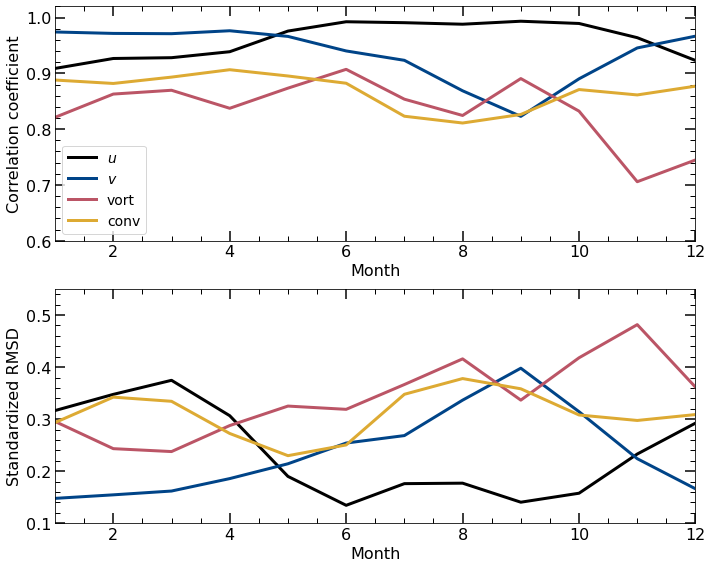

In [ ]:
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(10, 8), tight_layout='true')
#fig.suptitle('Slab boundary layer model vs. ERA5 climatology for control run', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,1,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   #plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Month', fontsize=16)
   plt.xlim(1,12)
   if jj == 0: 
      plt.ylabel('Correlation coefficient', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(month,corr_ua_vec, color=color, linewidth='3', label = r'$u$')
      color = '#004488'
      lns2 = ax1.plot(month,corr_va_vec, color=color, linewidth='3', label = r'$v$')
      color = '#BB5566'
      lns3 = ax1.plot(month,corr_rv_vec, color=color, linewidth='3', label = r'vort')
      color = '#DDAA33'
      lns4 = ax1.plot(month,corr_cv_vec, color=color, linewidth='3', label = r'conv')
      plt.ylim(0.6,1.02)
   if jj == 1: 
      plt.ylabel('Standardized RMSD', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(month,RMSE_ua_std, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(month,RMSE_va_std, color=color, linewidth='3')
      color = '#BB5566'
      lns3 = ax1.plot(month,RMSE_rv_std, color=color, linewidth='3')
      color = '#DDAA33'
      lns4 = ax1.plot(month,RMSE_cv_std, color=color, linewidth='3')
      plt.ylim(0.1,.55)
   if jj == 0: 
      # add these two lines
      lns = lns1+lns2+lns3+lns4
      labs = [l.get_label() for l in lns]
      ax1.legend(lns, labs, loc=3,fontsize=14)
    
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvrvcv_corr_RMSE.pdf", dpi=150)


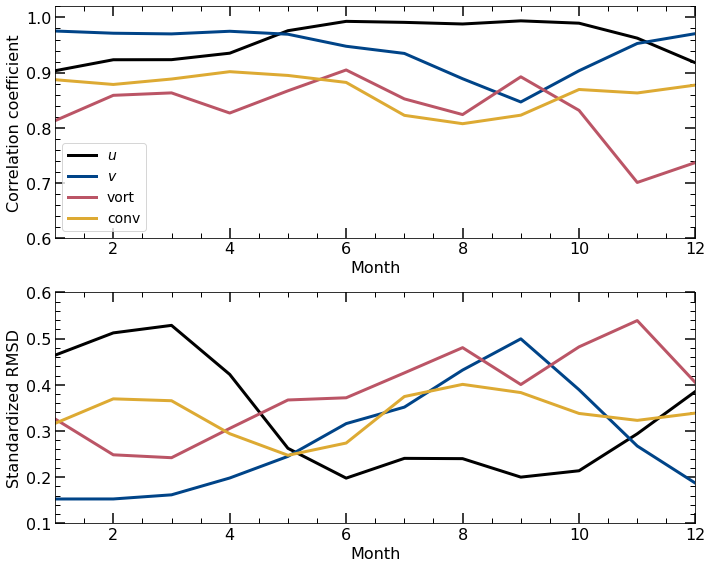

In [248]:
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(10, 8), tight_layout='true')
#fig.suptitle('Slab boundary layer model vs. ERA5 climatology for control run', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,1,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   #plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Month', fontsize=16)
   plt.xlim(1,12)
   if jj == 0: 
      plt.ylabel('Correlation coefficient', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(month,corr_us_vec, color=color, linewidth='3', label = r'$u$')
      color = '#004488'
      lns2 = ax1.plot(month,corr_vs_vec, color=color, linewidth='3', label = r'$v$')
      color = '#BB5566'
      lns3 = ax1.plot(month,corr_rvs_vec, color=color, linewidth='3', label = r'vort')
      color = '#DDAA33'
      lns4 = ax1.plot(month,corr_cvs_vec, color=color, linewidth='3', label = r'conv')
      plt.ylim(0.6,1.02)
   if jj == 1: 
      plt.ylabel('Standardized RMSD', fontsize=16)
      color = 'k' 
      lns1 = ax1.plot(month,RMSE_us_std, color=color, linewidth='3')
      color = '#004488'
      lns2 = ax1.plot(month,RMSE_vs_std, color=color, linewidth='3')
      color = '#BB5566'
      lns3 = ax1.plot(month,RMSE_rvs_std, color=color, linewidth='3')
      color = '#DDAA33'
      lns4 = ax1.plot(month,RMSE_cvs_std, color=color, linewidth='3')
      plt.ylim(0.1,.602)
   if jj == 0: 
      # add these two lines
      lns = lns1+lns2+lns3+lns4
      labs = [l.get_label() for l in lns]
      ax1.legend(lns, labs, loc=3,fontsize=14)
    
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
plt.savefig(figfolder+"sblm_uvrvcv_corr_RMSE_sfc.pdf", dpi=150)

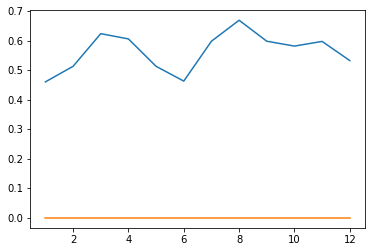

In [149]:
plt.plot(np.arange(1,nmon+1,1),RMSE_ua)
plt.plot(np.arange(1,nmon+1,1),RMSE_us)

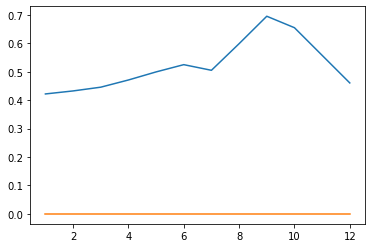

In [150]:
plt.plot(np.arange(1,nmon+1,1),RMSE_va)
plt.plot(np.arange(1,nmon+1,1),RMSE_vs)

NameError: name 'corr_us_vec' is not defined

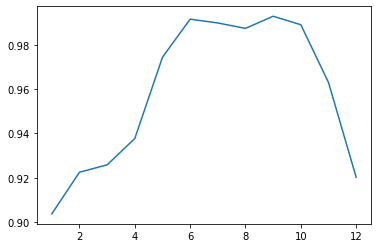

In [151]:
plt.plot(np.arange(1,nmon+1,1),corr_ua_vec)
plt.plot(np.arange(1,nmon+1,1),corr_us_vec)

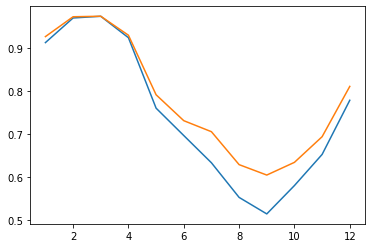

In [47]:
plt.plot(np.arange(1,nmon+1,1),corr_va_vec)
plt.plot(np.arange(1,nmon+1,1),corr_vs_vec)

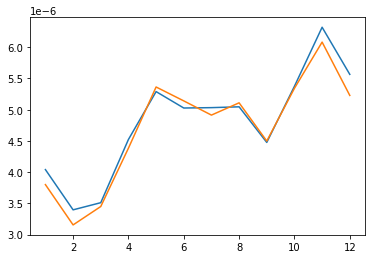

In [48]:
plt.plot(np.arange(1,nmon+1,1),RMSE_rv)
plt.plot(np.arange(1,nmon+1,1),RMSE_rvs)

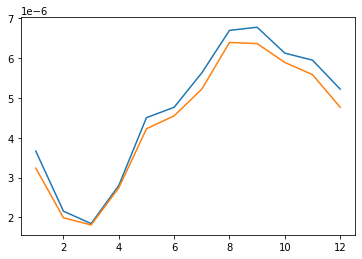

In [49]:
plt.plot(np.arange(1,nmon+1,1),RMSE_cv)
plt.plot(np.arange(1,nmon+1,1),RMSE_cvs)

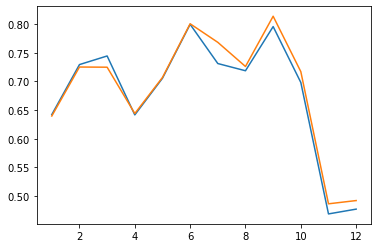

In [50]:
plt.plot(np.arange(1,nmon+1,1),corr_rv_vec)
plt.plot(np.arange(1,nmon+1,1),corr_rvs_vec)

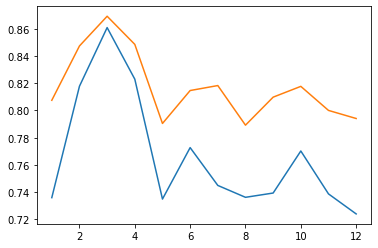

In [51]:
plt.plot(np.arange(1,nmon+1,1),corr_cv_vec)
plt.plot(np.arange(1,nmon+1,1),corr_cvs_vec)

In [122]:
# create density contour array based on min and max values
lev_v = np.arange(-9.0, 9.5, 1.)
lev_p = np.arange(-1.8, 2.0, .2)
lev_p_upper = np.arange(-2.5, 2.75, .25)
color_map_rb = plt.cm.get_cmap('RdBu')#.reversed()

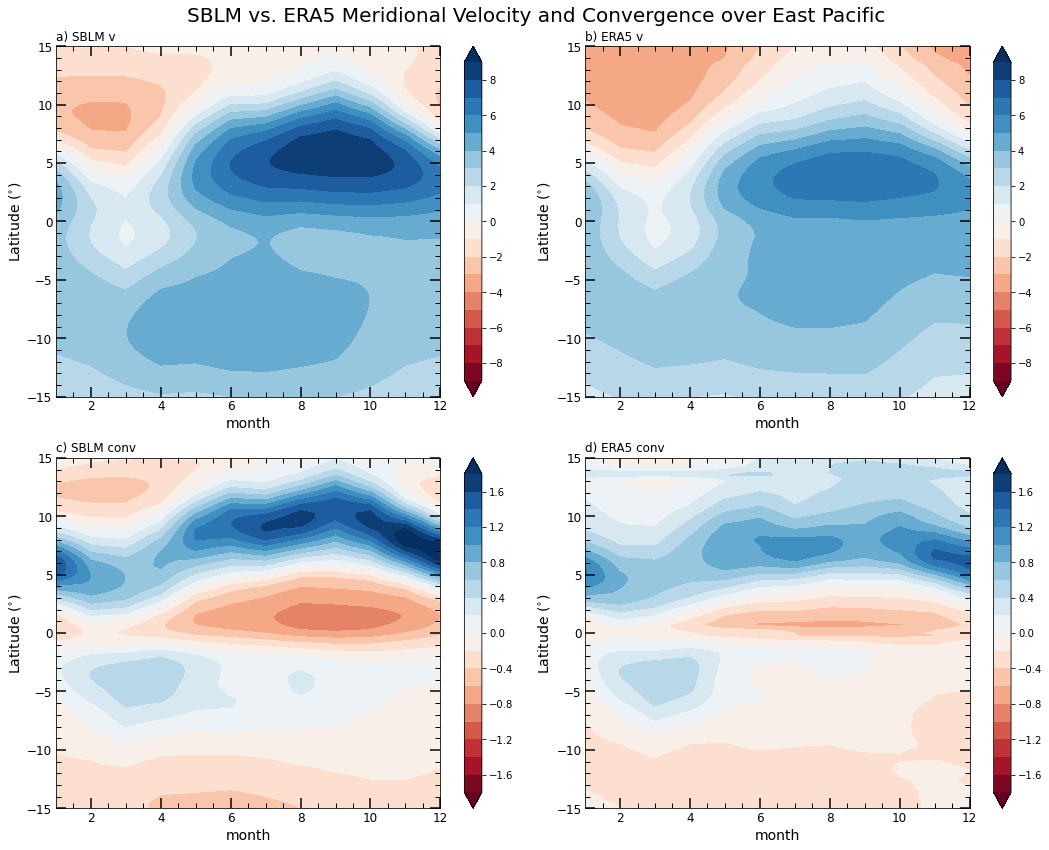

In [152]:
# plot hovmoller of convergence with RMSD values and correlations
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 12), tight_layout='true')
fig.suptitle(r'SBLM vs. ERA5 Meridional Velocity and Convergence over East Pacific', fontsize=20)
for j in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,j+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.xlabel('month', fontsize=14)
   plt.ylabel('Latitude ($^{\circ}$)', fontsize=14)
   #plt.axhline(850, color='0.65', linewidth = 2.0)
   plt.ylim(-15,15)
   if j == 0:
       plt.title(r'a) SBLM v',loc='left')
       cf = plt.contourf(month, va_sblm['latitude'], va_sblm.transpose(), cmap = color_map_rb, levels=lev_v, extend = 'both')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 1:
       plt.title(r'b) ERA5 v',loc='left')
       cf = plt.contourf(month, va_sblm['latitude'], va_era5.transpose(), cmap = color_map_rb, levels=lev_v, extend = 'both')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 2:
       plt.title(r'c) SBLM conv',loc='left')
       cf = plt.contourf(month, cv_sblm['latitude'], cv_sblm.transpose()*10**5, cmap = color_map_rb, levels=lev_p, extend = 'both')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 3:
       plt.title(r'd) ERA5 conv',loc='left')
       cf = plt.contourf(month, cv_sblm['latitude'], cv_era5.transpose()*10**5, cmap = color_map_rb, levels=lev_p, extend = 'both')
       cb = plt.colorbar(cf,orientation = 'vertical')